In [23]:
import pandas as pd
import numpy as np
#!pip install folium
#!pip install geopy
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe
#!conda install -c conda-forge folium=0.5.0
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Using Geocoder to get the latitude and longitudes of torento

In [2]:
#getting the latitude and longitudes of torento 
address_toronto = 'Toronto, ON'

geolocator_toronto = Nominatim(user_agent="toronto_explorer")
location_toronto = geolocator_toronto.geocode(address_toronto)
latitude_toronto = location_toronto.latitude
longitude_toronto = location_toronto.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [3]:
CLIENT_ID = 'Y5IFKV3FSKYTDUOU31Y3WUNWWNOUVDAVIHZZX451UKAWX3CP' # your Foursquare ID
CLIENT_SECRET = 'BTCT5X0FLTPE1ZXHCDP0OYV32OUWG12EMHPG5JZWITQGU5M4' # your Foursquare Secret
ACCESS_TOKEN = 'PUTT2XOBI2YB3K0OOKDLZRUVEMFI3QBBDG4YYFFISTZX02NF' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 1000
search_query = "restaurant "
catagory_id="4d4b7105d754a06374d81259"
radius = 500 # define radius

Calling the Foursquare to get the dataframe of restaurants in Toronto.


In [4]:
import requests # library to handle requests

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_toronto, longitude_toronto,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT,catagory_id)
url


'https://api.foursquare.com/v2/venues/search?client_id=Y5IFKV3FSKYTDUOU31Y3WUNWWNOUVDAVIHZZX451UKAWX3CP&client_secret=BTCT5X0FLTPE1ZXHCDP0OYV32OUWG12EMHPG5JZWITQGU5M4&ll=43.6534817,-79.3839347&oauth_token=PUTT2XOBI2YB3K0OOKDLZRUVEMFI3QBBDG4YYFFISTZX02NF&v=20180604&query=restaurant &radius=500&limit=1000&categoryId=4d4b7105d754a06374d81259'

In [5]:
# get the result to a json file
results_toronto = requests.get(url).json()

In [6]:
results_toronto

{'meta': {'code': 200, 'requestId': '602ba09977c0b13d34f459b8'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4ad4c05ff964a52048f720e3',
    'name': 'Hemispheres Restaurant & Bistro',
    'location': {'address': '110 Chestnut Street',
     'lat': 43.65488413420439,
     'lng': -79.38593077371578,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65488413420439,
       'lng': -79.38593077371578}],
     'distance': 224,
     'postalCode': 'M5G 1R3',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['110 Chestnut Street',
      'Toronto ON M5G 1R3',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d14e941735',
      'name': 'American Restaurant',
      'pluralName': 'American Restaurants',
      'shortName': 'American',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary'

In [7]:
# assign relevant part of JSON to venues
venues = results_toronto['response']['venues']

# tranform venues into a dataframe
df_results_toronto = json_normalize(venues)
df_results_toronto.head()


<ipython-input-7-63fa505ace75>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_results_toronto = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id,location.neighborhood
0,4ad4c05ff964a52048f720e3,Hemispheres Restaurant & Bistro,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1613471898,False,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",224,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,NaN
1,4b2027b5f964a520f82d24e3,Hong Shing Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1613471898,False,195 Dundas St W,43.654925,-79.387089,"[{'label': 'display', 'lat': 43.65492521335936...",300,M5G 1C7,CA,Toronto,ON,Canada,"[195 Dundas St W (at University Ave), Toronto ...",at University Ave,60327598,NaN
2,5a7c3e079de23b294a2c4117,Restaurant | Adelaide,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1613471898,False,325 Bay St (31st floor),43.649563,-79.380590,"[{'label': 'display', 'lat': 43.649563, 'lng':...",512,M5H,CA,Toronto,ON,Canada,"[325 Bay St (31st floor), Toronto ON M5H, Canada]",NaN,NaN,NaN
3,4cffc78a75d3236a3b10e7f7,Osgoode Hall Restaurant,"[{'id': '4bf58dd8d48988d157941735', 'name': 'N...",v-1613471898,False,130 Queen St W,43.651979,-79.385049,"[{'label': 'display', 'lat': 43.65197895903515...",189,M5H 2N6,CA,NaN,NaN,Canada,"[130 Queen St W (University Ave), M5H 2N6, Can...",University Ave,NaN,NaN
4,5f5eb99e0aea4b2a861bd0fa,T.&.C Restaurant,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1613471898,False,124 Chestnut St,43.655165,-79.385847,"[{'label': 'display', 'lat': 43.655165, 'lng':...",242,M5G 1R3,CA,Toronto,ON,Canada,"[124 Chestnut St, Toronto ON M5G 1R3, Canada]",NaN,NaN,NaN


In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_results_toronto.columns if col.startswith('location.')] + ['id']
dataframe_filtered_toronto = df_results_toronto.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered_toronto['categories'] = dataframe_filtered_toronto.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_toronto.columns = [column.split('.')[-1] for column in dataframe_filtered_toronto.columns]

dataframe_filtered_toronto.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Hemispheres Restaurant & Bistro,American Restaurant,110 Chestnut Street,43.654884,-79.385931,"[{'label': 'display', 'lat': 43.65488413420439...",224,M5G 1R3,CA,Toronto,ON,Canada,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]",NaN,NaN,4ad4c05ff964a52048f720e3
1,Hong Shing Chinese Restaurant,Chinese Restaurant,195 Dundas St W,43.654925,-79.387089,"[{'label': 'display', 'lat': 43.65492521335936...",300,M5G 1C7,CA,Toronto,ON,Canada,"[195 Dundas St W (at University Ave), Toronto ...",at University Ave,NaN,4b2027b5f964a520f82d24e3
2,Restaurant | Adelaide,Restaurant,325 Bay St (31st floor),43.649563,-79.380590,"[{'label': 'display', 'lat': 43.649563, 'lng':...",512,M5H,CA,Toronto,ON,Canada,"[325 Bay St (31st floor), Toronto ON M5H, Canada]",NaN,NaN,5a7c3e079de23b294a2c4117
3,Osgoode Hall Restaurant,New American Restaurant,130 Queen St W,43.651979,-79.385049,"[{'label': 'display', 'lat': 43.65197895903515...",189,M5H 2N6,CA,NaN,NaN,Canada,"[130 Queen St W (University Ave), M5H 2N6, Can...",University Ave,NaN,4cffc78a75d3236a3b10e7f7
4,T.&.C Restaurant,Asian Restaurant,124 Chestnut St,43.655165,-79.385847,"[{'label': 'display', 'lat': 43.655165, 'lng':...",242,M5G 1R3,CA,Toronto,ON,Canada,"[124 Chestnut St, Toronto ON M5G 1R3, Canada]",NaN,NaN,5f5eb99e0aea4b2a861bd0fa


Displaying the map with the blue dot so that the user can still view the individual resturants and their types

In [9]:
venues_map = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=15) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_toronto.lat, dataframe_filtered_toronto.lng, dataframe_filtered_toronto.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [10]:
df_toronto_food=dataframe_filtered_toronto.groupby(['categories']).size().to_frame(name='toronto counts')
df_toronto_food.head()

,toronto counts
categories,
American Restaurant,2
Asian Restaurant,4
Caribbean Restaurant,2
Chinese Restaurant,4
Dim Sum Restaurant,1


getting datasets for newyork

In [11]:
#getting the latitude and longitudes of torento 
address_ny = 'New York, NY'

geolocator_ny = Nominatim(user_agent="ny_explorer")
location_ny = geolocator_ny.geocode(address_ny)
latitude_ny = location_ny.latitude
longitude_ny = location_ny.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_ny, longitude_ny))

The geograpical coordinate of Toronto are 40.7127281, -74.0060152.


In [12]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_ny, longitude_ny,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT,catagory_id)
url

'https://api.foursquare.com/v2/venues/search?client_id=Y5IFKV3FSKYTDUOU31Y3WUNWWNOUVDAVIHZZX451UKAWX3CP&client_secret=BTCT5X0FLTPE1ZXHCDP0OYV32OUWG12EMHPG5JZWITQGU5M4&ll=40.7127281,-74.0060152&oauth_token=PUTT2XOBI2YB3K0OOKDLZRUVEMFI3QBBDG4YYFFISTZX02NF&v=20180604&query=restaurant &radius=500&limit=1000&categoryId=4d4b7105d754a06374d81259'

In [13]:
# get the result to a json file
results_ny = requests.get(url).json()
results_ny

{'meta': {'code': 200, 'requestId': '602ba09bdba4b9223d3f1363'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4bc238adf8219c744286b410',
    'name': "Amore's Pizza Restaurant",
    'location': {'address': '147 Chambers St',
     'crossStreet': 'Hudson Street',
     'lat': 40.715859606149245,
     'lng': -74.00988835781403,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.715859606149245,
       'lng': -74.00988835781403},
      {'label': 'entrance', 'lat': 40.715854, 'lng': -74.009749}],
     'distance': 477,
     'postalCode': '10007',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['147 Chambers St (Hudson Street)',
      'New York, NY 10007',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1ca941735',
      'name': 'Pizza Place',
      'pluralName': 'Pizza Places',
      'shortName': 'Pizza',
      'icon': {'prefix

In [14]:
# assign relevant part of JSON to venues
venues = results_ny['response']['venues']

# tranform venues into a dataframe
df_results_ny = json_normalize(venues)
df_results_ny.head()


<ipython-input-14-e95d302f4038>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_results_ny = json_normalize(venues)


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,4bc238adf8219c744286b410,Amore's Pizza Restaurant,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1613471899,False,147 Chambers St,Hudson Street,40.715860,-74.009888,"[{'label': 'display', 'lat': 40.71585960614924...",...,United States,"[147 Chambers St (Hudson Street), New York, NY...",1431324,https://www.seamless.com/menu/cafe-amores-pizz...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
1,45e5c256f964a52046431fe3,Mudville Restaurant & Tap House,"[{'id': '4bf58dd8d48988d14c941735', 'name': 'W...",v-1613471899,False,126 Chambers St,btwn W Broadway & Church St,40.715209,-74.008923,"[{'label': 'entrance', 'lat': 40.715239, 'lng'...",...,United States,[126 Chambers St (btwn W Broadway & Church St)...,299726,https://www.seamless.com/menu/mudville-restaur...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,43156651,NaN
2,4c4890da1879c9b6cce6e143,New Shezan Restaurant,"[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",v-1613471899,False,183 Church St,btwn Duane & Reade St.,40.715789,-74.007227,"[{'label': 'display', 'lat': 40.71578949233164...",...,United States,"[183 Church St (btwn Duane & Reade St.), New Y...",1237998,https://www.seamless.com/menu/sheezan-restaura...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN,NaN
3,4b88199af964a520e6df31e3,Win Won Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1613471899,False,10 Liberty Pl,Maiden Lane,40.709193,-74.009344,"[{'label': 'display', 'lat': 40.709193, 'lng':...",...,United States,"[10 Liberty Pl (Maiden Lane), New York, NY 100...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4b4fdfc8f964a520801827e3,TJ Byrnes Bar and Restaurant,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1613471899,False,77 Fulton St,Gold St,40.709233,-74.003747,"[{'label': 'display', 'lat': 40.70923312629616...",...,United States,"[77 Fulton St (Gold St), New York, NY 10038, U...",64746,https://www.seamless.com/menu/tj-byrnes-77-ful...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,131643631,NaN


In [15]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns_ny = ['name', 'categories'] + [col for col in df_results_ny.columns if col.startswith('location.')] + ['id']
dataframe_filtered_ny = df_results_ny.loc[:, filtered_columns_ny]

In [16]:
# filter the category for each row
dataframe_filtered_ny['categories'] = dataframe_filtered_ny.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered_ny.columns = [column.split('.')[-1] for column in dataframe_filtered_ny.columns]

dataframe_filtered_ny.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Amore's Pizza Restaurant,Pizza Place,147 Chambers St,Hudson Street,40.715860,-74.009888,"[{'label': 'display', 'lat': 40.71585960614924...",477,10007,US,New York,NY,United States,"[147 Chambers St (Hudson Street), New York, NY...",NaN,4bc238adf8219c744286b410
1,Mudville Restaurant & Tap House,Wings Joint,126 Chambers St,btwn W Broadway & Church St,40.715209,-74.008923,"[{'label': 'entrance', 'lat': 40.715239, 'lng'...",369,10007,US,New York,NY,United States,[126 Chambers St (btwn W Broadway & Church St)...,NaN,45e5c256f964a52046431fe3
2,New Shezan Restaurant,Middle Eastern Restaurant,183 Church St,btwn Duane & Reade St.,40.715789,-74.007227,"[{'label': 'display', 'lat': 40.71578949233164...",355,10007,US,New York,NY,United States,"[183 Church St (btwn Duane & Reade St.), New Y...",NaN,4c4890da1879c9b6cce6e143
3,Win Won Restaurant,Chinese Restaurant,10 Liberty Pl,Maiden Lane,40.709193,-74.009344,"[{'label': 'display', 'lat': 40.709193, 'lng':...",483,10038,US,New York,NY,United States,"[10 Liberty Pl (Maiden Lane), New York, NY 100...",NaN,4b88199af964a520e6df31e3
4,TJ Byrnes Bar and Restaurant,Restaurant,77 Fulton St,Gold St,40.709233,-74.003747,"[{'label': 'display', 'lat': 40.70923312629616...",433,10038,US,New York,NY,United States,"[77 Fulton St (Gold St), New York, NY 10038, U...",NaN,4b4fdfc8f964a520801827e3


Displaying the restaurants of new york in the map along with the blue dot to see their location and type

In [17]:
venues_map_ny = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=15) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_ny.lat, dataframe_filtered_ny.lng, dataframe_filtered_ny.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_ny)

# display map
venues_map_ny

In [18]:
df_ny_food=dataframe_filtered_ny.groupby(['categories']).size().to_frame(name='ny counts')
df_ny_food.head()

,ny counts
categories,
American Restaurant,2
Cajun / Creole Restaurant,1
Chinese Restaurant,4
Cuban Restaurant,1
Diner,1


Creating a new dataset with the category of resturants in Toronto and New york

In [19]:
result = pd.concat([df_toronto_food, df_ny_food], axis=1, join="outer")

In [20]:
result['toronto counts'] = result['toronto counts'].replace(np.nan, 0)
result['ny counts'] = result['ny counts'].replace(np.nan, 0)
result['toronto counts'] = result['toronto counts'].astype(int)
result['ny counts'] = result['ny counts'].astype(int)
result.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
result

,toronto counts,ny counts
American Restaurant,2,2
Asian Restaurant,4,0
Caribbean Restaurant,2,0
Chinese Restaurant,4,4
Dim Sum Restaurant,1,0
Diner,2,1
Fast Food Restaurant,2,1
Indian Restaurant,4,2
Italian Restaurant,3,5
Japanese Restaurant,4,4


creating a horizontal bar with the catagory of restaurants and their respective counts in new york and Toronto to find the missing number of cuisines in the respective cities which is available in the other cities

In [21]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

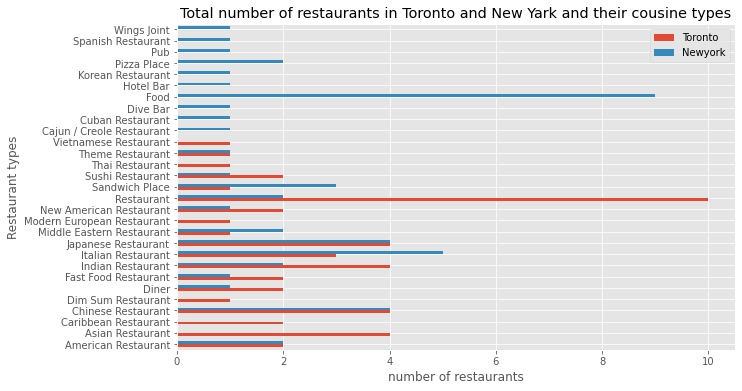

In [22]:
result.plot(kind='barh', figsize=(10, 6))

plt.xlabel('number of restaurants') # add to x-label to the plot
plt.ylabel('Restaurant types') # add y-label to the plot
plt.title('Total number of restaurants in Toronto and New Yark and their cousine types') # add title to the plot
plt.legend(['Toronto', 'Newyork'])

plt.show()